# **Task 3.1 Unsupervised Learning - Clustering**

- load dataset diabetes.csv (Use pandas.read_csv())
- Preprocess data using z-transformation
    - Use StandardScaler from sklearn.preprocessing
- Apply KMeans clustering
    - Use KMeans from sklearn.cluster
    - Vary k from 2 to 5
    - Compute the Silhouette coefficient using metrics.silhouette_score
    - Select the best k based on the highest score

- Visualize final KMeans clustering using PCA
    - Use PCA(n_components=2) from sklearn.decomposition
    - Plot clusters using matplotlib.pyplot.scatter()

- Perform hierarchical clustering
    - Use linkage() from scipy.cluster.hierarchy
    - Plot dendrogram using dendrogram()

- Create a heatmap
    - Use seaborn.heatmap() for clustering of samples and variables

- Perform density-based clustering
    - Use DBSCAN from sklearn.cluster

In [ ]:
# preparations
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# load the CSV file into a DataFrame
food_df = pd.read_csv('food.csv', index_col=0)
print(food_df)


# clean up dataset

# function for IQR based outlier detection

def detect_outliers_iqr(df, numeric_columns):
    df_with_outliers = pd.DataFrame(index=df.index)
    
    for col in numeric_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        df_with_outliers[f'{col}_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)
          
    return df_with_outliers

# Get only numeric columns
numeric_columns = food_df.select_dtypes(include=['number']).columns.tolist()

# Detect outliers in diabetes.csv
outliers = detect_outliers_iqr(food_df, numeric_columns)


# replacing outliers with NA  
df_with_outliers = food_df.copy()

for col in numeric_columns: 
    mask = outliers[f'{col}_outlier']
    df_with_outliers.loc[mask, col] = np.nan

# selecting complete cases (= removing rows with NA´s)

df_clean_data_food = df_with_outliers.dropna()
print(df_clean_data_food)

                RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  Nuts  \
Albania            10.1        1.4   0.5   8.9   0.2     42.3     0.6   5.5   
Austria             8.9       14.0   4.3  19.9   2.1     28.0     3.6   1.3   
Belgium            13.5        9.3   4.1  17.5   4.5     26.6     5.7   2.1   
Bulgaria            7.8        6.0   1.6   8.3   1.2     56.7     1.1   3.7   
Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   1.1   
Denmark            10.6       10.8   3.7  25.0   9.9     21.9     4.8   0.7   
E Germany           8.4       11.6   3.7  11.1   5.4     24.6     6.5   0.8   
Finland             9.5        4.9   2.7  33.7   5.8     26.3     5.1   1.0   
France             18.0        9.9   3.3  19.5   5.7     28.1     4.8   2.4   
Greece             10.2        3.0   2.8  17.6   5.9     41.7     2.2   7.8   
Hungary             5.3       12.4   2.9   9.7   0.3     40.1     4.0   5.4   
Ireland            13.9       10.0   4.7  25.8   2.2

In [26]:
# Preprocessing data using z-transformer (StandardScaler from sklearn.preprocession)

# copy to work with
data = df_clean_data_food.copy()


scaler = StandardScaler()               # transformation with sklearn
scaled_data = scaler.fit_transform(data.select_dtypes(include='number'))
scaled_df_food = pd.DataFrame(scaled_data, columns=data.select_dtypes(include='number').columns)

print(scaled_df_food.head()) # prints only the first five rows

    RedMeat  WhiteMeat      Eggs      Milk      Fish   Cereals    Starch  \
0 -0.259862   1.559976  1.415610  0.251173 -0.740489 -0.334023 -0.526678   
1  1.801116   0.205980  1.173626 -0.107646  0.145882 -0.470359  0.864547   
2 -0.752705  -0.744698 -1.851183 -1.483117 -1.072878  2.460866 -2.182897   
3  0.098569   0.810957 -0.399275 -0.855184 -0.777421  0.279489  0.400805   
4  0.501803   0.638107  0.689656  1.013662  2.140217 -0.928059  0.268308   

       Nuts    Fr.Veg  
0 -0.743424  0.163383  
1 -0.334669 -0.025136  
2  0.482843  0.100543  
3 -0.845613 -0.025136  
4 -1.049991 -1.030570  


In [27]:
# applying KMeans clustering with k from 2 to 5

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

best_k = 2
best_score = -1

k_range = range(2, 6)
silhouette_scores = []

for k in k_range: 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_df_food)

    # calculate shilouette score
    silhouette_avg = silhouette_score(scaled_df_food, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg: .3f}")

    if silhouette_avg > best_score:
        best_score = best_score
        best_k = k

    print(f"Best k based on silhouette score: {best_k}")

# Best k = 5

# Means Clustering with k = 5

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_df_food)

For n_clusters = 2, the silhouette score is  0.300
Best k based on silhouette score: 2
For n_clusters = 3, the silhouette score is  0.261
Best k based on silhouette score: 3
For n_clusters = 4, the silhouette score is  0.274
Best k based on silhouette score: 4
For n_clusters = 5, the silhouette score is  0.273
Best k based on silhouette score: 5


<function matplotlib.pyplot.show(close=None, block=None)>

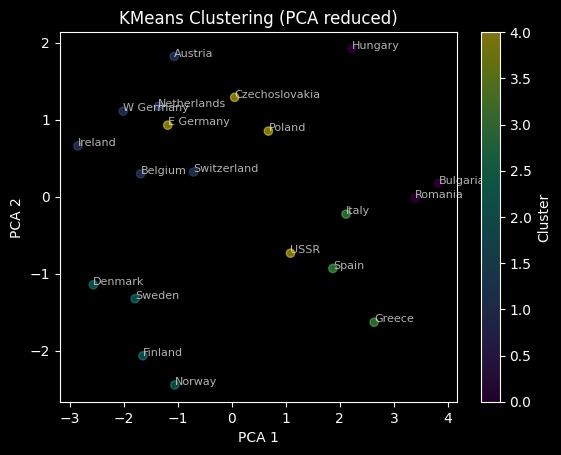

In [ ]:
# vizualing final KMeans clustering using PCA (this part was done using chatGPT as support)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df_food)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)

# Länderbeschriftungen hinzufügen (ChatGPT-code)
for i, country in enumerate(df_clean_data_food.index):
    plt.text(pca_data[i, 0], pca_data[i, 1], country, fontsize=8, alpha=0.7)

plt.title("KMeans Clustering (PCA reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show


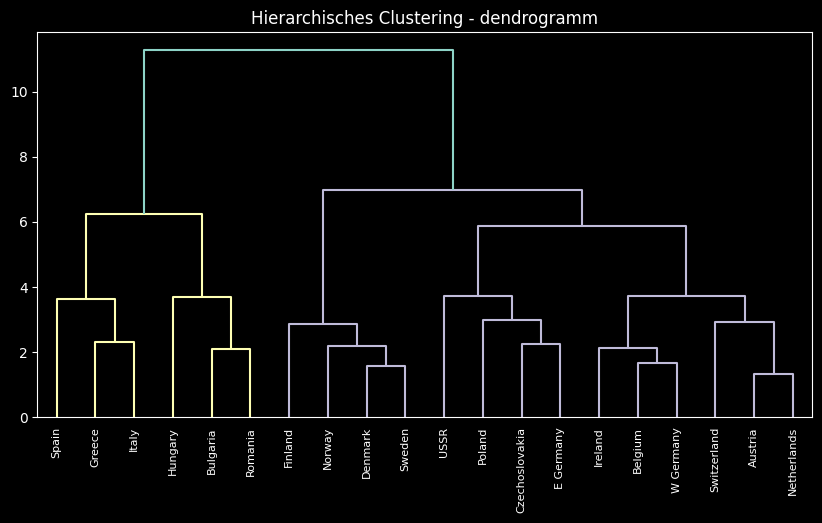

In [42]:
# performing hierarchical clustering (this part was done using chatGPT as support)

from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(scaled_df_food, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df_clean_data_food.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchisches Clustering - dendrogramm")
plt.show()


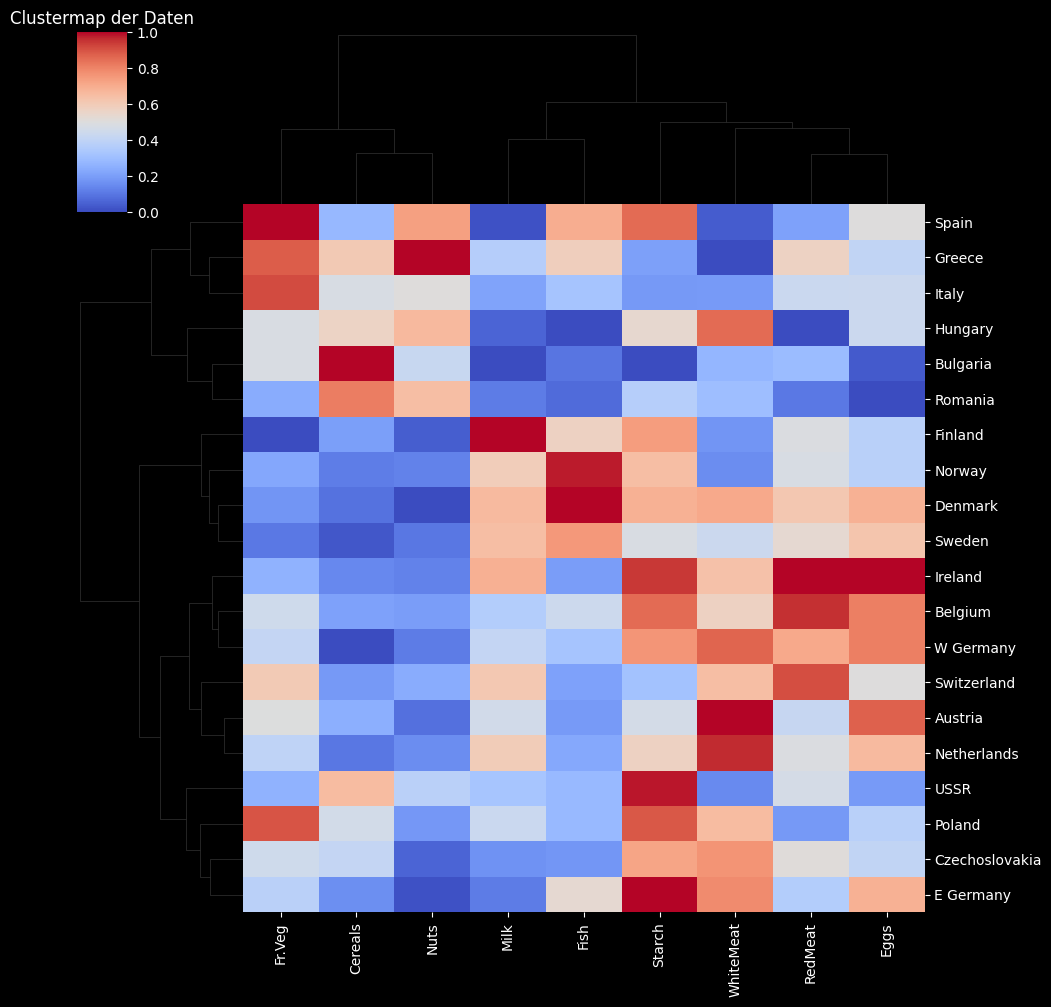

In [43]:
# creating a heatmap / clustermap (this part was done using chatGPT as support)

sns.clustermap(scaled_df_food, cmap='coolwarm', method='ward', metric='euclidean', standard_scale=1, row_cluster=True, col_cluster=True, xticklabels=True, yticklabels=df_clean_data_food.index)
plt.title("Clustermap der Daten")
plt.show()


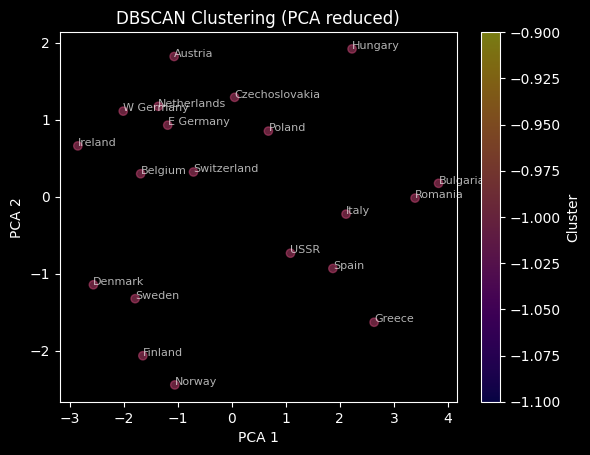

In [44]:
# performing density based clustering (this part was done using chatGPT as support)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df_food)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.5)

# Länderbeschriftungen hinzufügen (ChatGPT-code)
for i, country in enumerate(df_clean_data_food.index):
    plt.text(pca_data[i, 0], pca_data[i, 1], country, fontsize=8, alpha=0.7)

plt.title("DBSCAN Clustering (PCA reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()